# 아이템 기반 최근접 이웃 협업 필터링
- 최근접 이웃 현업 필터링은 사용자 기반과 아이템 기반으로 나뉨. 이 중 일반적으로 추천 정확도가 더 뛰어난 아이템 기반의 협업 필터링을 구현해보기
- 협업 필터링 기반의 영화 추천을 위해서는 사용자가 영화의 쳥점을 매긴 사용자-영화 평점 행렬 데이터세트가 필요함.

In [7]:
# 데이터 가공 및 변환
import pandas as pd
import numpy as np
movies=pd.read_csv("C:/Users/MYCOM/Downloads/ml-latest-small/ml-latest-small/movies.csv")
ratings=pd.read_csv("C:/Users/MYCOM/Downloads/ml-latest-small/ml-latest-small/ratings.csv")
print(movies.shape)
print(ratings.shape)

(9742, 3)
(100836, 4)


In [8]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [9]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [10]:
# 협업 필터링은 이 ratings 데이터 세트와 같이 사용자와 아이템 간의 평점에 기반해
# 추천하는 시스템
# 아이템 기반의 최근접 이웃 협업 필터링을 위해선 먼저 행 레벨 형태의 원본 데이터 세트를
# 모든 사용자를 행으로 영화를 열로 구성한 데이터 세트로 변경해야 함
# 이를 위해 pivot_table 함수 이용
ratings=ratings[['userId','movieId','rating']]
ratings_matrix=ratings.pivot_table('rating',index='userId',columns='movieId')
ratings_matrix.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# title 칼럼을 얻기 위해 movies와 조인
rating_movies=pd.merge(ratings,movies,on='movieId')
# columns='title'로 title 칼럼으로 피벗 수행
ratings_matrix=rating_movies.pivot_table('rating',index='userId',columns='title')
# NAN 값을 모두 0으로 변환
ratings_matrix=ratings_matrix.fillna(0)
ratings_matrix.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
# 영화간 유사도 산출
# 변환된 사용자-영화 평점 행렬 데이터 세트를 이용해 영화 간의 유사도 측정
# 코사인 유사도를 기반으로 하고 있음
# 이때 cosine_similarity 적용하려면 ratings_matrix 행 기준이 영화가 되고
# 열 기준이 사용자가 되어야함
ratings_matrixT=ratings_matrix.transpose()
ratings_matrixT.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
'Hellboy': The Seeds of Creation (2004),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Round Midnight (1986),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Salem's Lot (2004),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Til There Was You (1997),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
# 코사인 유사도 구해서 반환된 넘파이 행렬을 영화명에 매핑해 데이터프레임으로 변환
from sklearn.metrics.pairwise import cosine_similarity
item_sim=cosine_similarity(ratings_matrixT,ratings_matrixT)
item_sim_df=pd.DataFrame(data=item_sim,index=ratings_matrix.columns,
                         columns=ratings_matrix.columns)
print(item_sim_df.shape)
item_sim_df.head()

(9719, 9719)


title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.141653,0.0,...,0.0,0.342055,0.543305,0.707107,0.0,0.0,0.139431,0.327327,0.0,0.0
'Hellboy': The Seeds of Creation (2004),0.0,1.000000,0.707107,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
'Round Midnight (1986),0.0,0.707107,1.000000,0.000000,0.000000,0.0,0.176777,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
'Salem's Lot (2004),0.0,0.000000,0.000000,1.000000,0.857493,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
'Til There Was You (1997),0.0,0.000000,0.000000,0.857493,1.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0


In [17]:
# thegodfather과 유사도가 높은 상위 6개 영화 추출해보기
item_sim_df['Godfather, The (1972)'].sort_values(ascending=False)[:6]

title
Godfather, The (1972)                        1.000000
Godfather: Part II, The (1974)               0.821773
Goodfellas (1990)                            0.664841
One Flew Over the Cuckoo's Nest (1975)       0.620536
Star Wars: Episode IV - A New Hope (1977)    0.595317
Fargo (1996)                                 0.588614
Name: Godfather, The (1972), dtype: float64

In [18]:
# 인셉션과 유사도가 높은 영화 찾아보기
item_sim_df['Inception (2010)'].sort_values(ascending=False)[1:6]

title
Dark Knight, The (2008)          0.727263
Inglourious Basterds (2009)      0.646103
Shutter Island (2010)            0.617736
Dark Knight Rises, The (2012)    0.617504
Fight Club (1999)                0.615417
Name: Inception (2010), dtype: float64

## 아이템 기반 최근접 이웃 협업 필터링으로 개인화된 영화 추천
- 이때 개인화된 예측 평점을 구하는 식
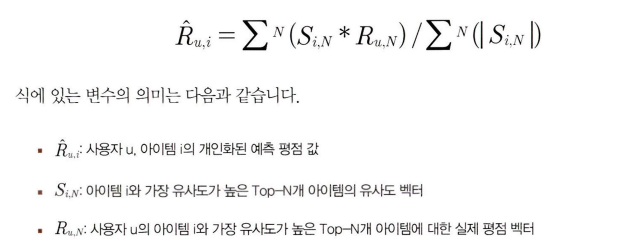

In [20]:
# 이를 구현한 코드
def predict_rating(ratings_arr,item_sim_arr):
    ratings_pred=ratings_arr.dot(item_sim_arr)/np.array([np.abs(item_sim_arr).sum(axis=1)])
    return ratings_pred
# 이 코드로 개인화된 예측 평점 구하기
ratings_pred=predict_rating(ratings_matrix.values,item_sim_df.values)
ratings_pred_matrix=pd.DataFrame(data=ratings_pred,index=ratings_matrix.index,columns=ratings_matrix.columns)

In [21]:
ratings_pred_matrix.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.070345,0.577855,0.321696,0.227055,0.206958,0.194615,0.249883,0.102542,0.157084,0.178197,...,0.113608,0.181738,0.133962,0.128574,0.006179,0.212070,0.192921,0.136024,0.292955,0.720347
2,0.018260,0.042744,0.018861,0.000000,0.000000,0.035995,0.013413,0.002314,0.032213,0.014863,...,0.015640,0.020855,0.020119,0.015745,0.049983,0.014876,0.021616,0.024528,0.017563,0.000000
3,0.011884,0.030279,0.064437,0.003762,0.003749,0.002722,0.014625,0.002085,0.005666,0.006272,...,0.006923,0.011665,0.011800,0.012225,0.000000,0.008194,0.007017,0.009229,0.010420,0.084501
4,0.049145,0.277628,0.160448,0.206892,0.309632,0.042337,0.130048,0.116442,0.099785,0.097432,...,0.051269,0.076051,0.055563,0.054137,0.008343,0.159242,0.100941,0.062253,0.146054,0.231187
5,0.007278,0.066951,0.041879,0.013880,0.024842,0.018240,0.026405,0.018673,0.021591,0.018841,...,0.009689,0.022246,0.013360,0.012378,0.000000,0.025839,0.023712,0.018012,0.028133,0.052315


In [30]:
# 예측 평점이 사용자별 영화의 실제 평점과 영화의 코사인 유사도를 dot한 값이기 때문에
# 기존에 영화를 관람하지 않아 0에 해당했던 실제 영화 평점이 예측에서는 값이 부여되는 경우가 많음
# 따라서 예측 평점이 실제 평점에 비해 작을 수 있음. 이는 내적 결과를 코사인 유사도 벡터 합으로 나누었기 때문에임
# 예측 결과가 원래의 실제 평점과 얼마나 차이가 있는지 확인하기 위해 예측 평가 지표는 MSE 적용하기
from sklearn.metrics import mean_squared_error
# 사용자가 평점을 부여한 영화에 대해서만 예측 성능 평가 MSE 구함
def get_mse(pred,actual):
    # 평점이 있는 실제 영화만 추출
    pred=pred[actual.nonzero()].flatten()
    actual=actual[actual.nonzero()].flatten()
    return mean_squared_error(pred,actual)
print('아이템 기반 모든 최근접 이웃 MSE',get_rmse(ratings_pred,ratings_matrix.values)
     )

아이템 기반 모든 최근접 이웃 MSE 3.6949999176225483


In [31]:
# 특정 영화와 가장 비슷한 유사도를 가지는 영화에 대해서만 유사도 벡터를 적용하는 함수로 변경하기
def predict_rating_topsim(ratings_arr,item_sim_arr,n=20):
    # 사용자 아이템 평점 행렬 크기만큼 0으로 채운 예측 행렬 초기화
    pred=np.zeros(ratings_arr.shape)
    # 사용자 아이템 평점 행렬의 열 크기만큼 루프 수행
    for col in range(ratings_arr.shape[1]):
        # 유사도 행렬에서 유사도가 큰 순으로 n개 데이터 행렬의 인덱스 반환
        top_n_items=[np.argsort(item_sim_arr[:,col])[:-n-1:-1]]
        # 개인화된 예측 평점 계산
        for row in range(ratings_arr.shape[0]):
            pred[row,col]=item_sim_arr[col,:][top_n_items].dot(ratings_arr[row,:][top_n_items].T)
            pred[row,col]/=np.sum(np.abs(item_sim_arr[col,:][top_n_items]))
    return pred

In [32]:
ratings_pred=predict_rating_topsim(ratings_matrix.values,item_sim_df.values,n=20)
print('아이쳄 기반 최근점 top 20 이웃 mse',get_mse(ratings_pred,ratings_matrix.values))
# 계산된 예측 평점 데이터는 데이터프레임으로 이재생성
ratings_pred_matrix=pd.DataFrame(data=ratings_pred,index=ratings_matrix.index,columns=ratings_matrix.columns)

아이쳄 기반 최근점 top 20 이웃 mse 3.6949999176225483


In [33]:
# 사용자가 평점을 준 영화를 평점 높은 순으로 나열해보기
user_rating_id=ratings_matrix.loc[9,:]
user_rating_id[user_rating_id>0].sort_values(ascending=False)[:10]

title
Adaptation (2002)                                                                 5.0
Citizen Kane (1941)                                                               5.0
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)    5.0
Producers, The (1968)                                                             5.0
Lord of the Rings: The Two Towers, The (2002)                                     5.0
Lord of the Rings: The Fellowship of the Ring, The (2001)                         5.0
Back to the Future (1985)                                                         5.0
Austin Powers in Goldmember (2002)                                                5.0
Minority Report (2002)                                                            4.0
Witness (1985)                                                                    4.0
Name: 9, dtype: float64

In [35]:
# 이 사용자에게 아이템 기반 협업 필터링을 통해 영화 추천
# 먼저 사용자가 이미 평점을 준 영화를 제외하고 추천할 수 있도록 평점을 주지 않은 영화를 리스트 객체로 반환하는 함수 사용
def get_unseen_movies(ratings_matrix,userId):
    # userId로 입력받은 사용자의 모든 영화 정보를 추출해 시리즈로 반환
    # 반환된 user_rating은 영화명을 인덱스로 가지는 시리즈 객체임
    user_rating=ratings_matrix.loc[userId,:]
    # user_rating이 0보다 크면 기존에 관람한영화임
    # 대상 인덱스를 추출해 리스트 객체로 만듦
    already=user_rating[user_rating>0].index.tolist()
    # 모든 영화명을 리스트 객체로 
    movies_list=ratings_matrix.columns.tolist()
    # 리스트 컴프리핸션으로 already에 있는 영화 제외하기
    unseen=[movie for movie in movies_list if movie not in already]
    return unseen

In [37]:
# 최정적으로 사용자에게 영화 추천해주는 함수
def recomm_movie_by_userid(pred_df,userId,unseen,top_n=10):
    # 예측 평점을 데이터프레임에서 사용자 아이디 인덱스와 unseen으로 들어온 영화명 추출해 가장 예측평점이 높은 순으로 정렬함
    recomm_movies=pred_df.loc[userId,unseen].sort_values(ascending=False)[:top_n]
    return recomm_movies
# 사용자가 관람하지 않은 영화명 추출
unseen=get_unseen_movies(ratings_matrix,9)
# 아이템 기반의 최근접 협업 필터링으로 영화 추천
recomm_movies=recomm_movie_by_userid(ratings_pred_matrix,9,unseen)
# 평점 데이터를 데이터프레임으로 생성
recomm_movies=pd.DataFrame(data=recomm_movies.values,index=recomm_movies.index,
                          columns=['pred_score'])
recomm_movies

,pred_score
title,
Shrek (2001),0.866202
Spider-Man (2002),0.857854
"Last Samurai, The (2003)",0.817473
Indiana Jones and the Temple of Doom (1984),0.816626
"Matrix Reloaded, The (2003)",0.800990
Harry Potter and the Sorcerer's Stone (a.k.a. Harry Potter and the Philosopher's Stone) (2001),0.765159
Gladiator (2000),0.740956
"Matrix, The (1999)",0.732693
Pirates of the Caribbean: The Curse of the Black Pearl (2003),0.689591


## 행렬 분해를 이용한 잠재 요인 협업 필터링 실습
- SGD 기반의 행렬 분해


In [47]:
def get_rmse(R, P, Q, non_zeros):
    error = 0
    # 두개의 분해된 행렬 P와 Q.T의 내적 곱으로 예측 R 행렬 생성
    full_pred_matrix = np.dot(P, Q.T)
     
    # 실제 R 행렬에서 널이 아닌 값의 위치 인덱스 추출하여 실제 R 행렬과 예측 행렬의 RMSE 추출
    x_non_zero_ind = [non_zero[0] for non_zero in non_zeros]
    y_non_zero_ind = [non_zero[1] for non_zero in non_zeros]
    R_non_zeros = R[x_non_zero_ind, y_non_zero_ind]
     
    full_pred_matrix_non_zeros = full_pred_matrix[x_non_zero_ind, y_non_zero_ind]
       
    mse = mean_squared_error(R_non_zeros, full_pred_matrix_non_zeros)
    rmse = np.sqrt(mse)
     
    return rmse
def matrix_factorization(R, K, steps=200, learning_rate=0.01, r_lambda = 0.01):
    num_users, num_items = R.shape
    # P와 Q 매트릭스의 크기를 지정하고 정규분포를 가진 랜덤한 값으로 입력합니다.
    np.random.seed(1)
    P = np.random.normal(scale=1./K, size=(num_users, K))
    Q = np.random.normal(scale=1./K, size=(num_items, K))
 
    break_count = 0
        
    # R > 0 인 행 위치, 열 위치, 값을 non_zeros 리스트 객체에 저장.
    non_zeros = [ (i, j, R[i,j]) for i in range(num_users) for j in range(num_items) if R[i,j] > 0 ]
     
    # SGD기법으로 P와 Q 매트릭스를 계속 업데이트.
    for step in range(steps):
        for i, j, r in non_zeros:
            # 실제 값과 예측 값의 차이인 오류 값 구함
            eij = r - np.dot(P[i, :], Q[j, :].T)
            # Regularization을 반영한 SGD 업데이트 공식 적용
            P[i,:] = P[i,:] + learning_rate*(eij * Q[j, :] - r_lambda*P[i,:])
            Q[j,:] = Q[j,:] + learning_rate*(eij * P[i, :] - r_lambda*Q[j,:])
         
        rmse = get_rmse(R, P, Q, non_zeros)
        if (step % 10) == 0 :
            print("### iteration step : ", step," rmse : ", rmse)
             
    return P, Q

In [48]:
movies=pd.read_csv("C:/Users/MYCOM/Downloads/ml-latest-small/ml-latest-small/movies.csv")
ratings=pd.read_csv("C:/Users/MYCOM/Downloads/ml-latest-small/ml-latest-small/ratings.csv")
ratings=ratings[['userId','movieId','rating']]
ratings_matrix = ratings.pivot_table('rating', index='userId', columns='movieId')
# title 컬럼을 얻기 이해 movies 와 조인 수행
rating_movies = pd.merge(ratings, movies, on='movieId')

# columns='title' 로 title 컬럼으로 pivot 수행.
ratings_matrix = rating_movies.pivot_table('rating', index='userId', columns='title')

P, Q = matrix_factorization(ratings_matrix.values, K=50, steps=200, learning_rate=0.01, r_lambda = 0.01)
pred_matrix = np.dot(P, Q.T)


### iteration step :  0  rmse :  2.9023619751336867
### iteration step :  10  rmse :  0.7335768591017927
### iteration step :  20  rmse :  0.5115539026853442
### iteration step :  30  rmse :  0.37261628282537446
### iteration step :  40  rmse :  0.2960818299181014
### iteration step :  50  rmse :  0.2520353192341642
### iteration step :  60  rmse :  0.22487503275269854
### iteration step :  70  rmse :  0.2068545530233154
### iteration step :  80  rmse :  0.19413418783028688
### iteration step :  90  rmse :  0.18470082002720406
### iteration step :  100  rmse :  0.17742927527209104
### iteration step :  110  rmse :  0.1716522696470749
### iteration step :  120  rmse :  0.16695181946871723
### iteration step :  130  rmse :  0.16305292191997542
### iteration step :  140  rmse :  0.15976691929679646
### iteration step :  150  rmse :  0.1569598699945732
### iteration step :  160  rmse :  0.1545339818671543
### iteration step :  170  rmse :  0.15241618551077643
### iteration step :  180  rms

In [49]:
ratings_pred_matrix = pd.DataFrame(data=pred_matrix, index= ratings_matrix.index,
                                   columns = ratings_matrix.columns)
 
ratings_pred_matrix.head(3)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,3.055084,4.092018,3.564130,4.502167,3.981215,1.271694,3.603274,2.333266,5.091749,3.972454,...,1.402608,4.208382,3.705957,2.720514,2.787331,3.475076,3.253458,2.161087,4.010495,0.859474
2,3.170119,3.657992,3.308707,4.166521,4.311890,1.275469,4.237972,1.900366,3.392859,3.647421,...,0.973811,3.528264,3.361532,2.672535,2.404456,4.232789,2.911602,1.634576,4.135735,0.725684
3,2.307073,1.658853,1.443538,2.208859,2.229486,0.780760,1.997043,0.924908,2.970700,2.551446,...,0.520354,1.709494,2.281596,1.782833,1.635173,1.323276,2.887580,1.042618,2.293890,0.396941


In [51]:
unseen=get_unseen_movies(ratings_matrix,9)
# 잠재요인 협업 필터링으로 영화 추천
recomm_movies=recomm_movie_by_userid(ratings_matrix,9,unseen)
# 평점 데이터를 데이터프레임으로 생성
recomm_movies=pd.DataFrame(data=recomm_movies.values,index=recomm_movies.index,
                          columns=['pred_score'])
recomm_movies

,pred_score
title,
'71 (2014),NaN
'Hellboy': The Seeds of Creation (2004),NaN
'Round Midnight (1986),NaN
'Salem's Lot (2004),NaN
'Til There Was You (1997),NaN
'Tis the Season for Love (2015),NaN
"'burbs, The (1989)",NaN
'night Mother (1986),NaN
(500) Days of Summer (2009),NaN
